In [2]:
# Libraries
import torch
import numpy as np
import torchvision
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# 1. Data Generation 

In this section you can create different data types in each cell as a class structure 

In [3]:
# Sinusoidal Data Generation 

class Sinusoidal_data:
    def __init__(self,batch_size = 100, noise=0.01,tr_size=100,val_size=100,te_size=20000):

        # Train / Validation / Test Size 
        self.tr_size = tr_size
        self.val_size = val_size
        self.te_size = te_size 
        self.batch_size = batch_size

        # Noise percetage 
        # (Low : %1 = 0.01 , Middle : %5 = 0.05 , High %10 = 0.1)
        self.noise = noise


    def get_data(self):

        # Train data 
        x_train = 2*np.random.randn(self.tr_size, 2)
        u = np.zeros(shape=(1, 2))
        u[0, 0] = 1
        v = np.zeros(shape=(1, 2))
        v[0, 1] = 1
        y_train = np.sign(u.dot(x_train.T) + np.sin(v.dot(x_train.T))).astype(np.int32).reshape(self.tr_size)

        # Flip some output labels randomly as a noise 
        idx = np.random.permutation(self.tr_size)[:int(self.tr_size*self.noise)]
        y_train[idx] *= -1
        y_train = (y_train+1)//2
        #y_train = np.reshape(y_train,(y_train.shape[0],1))
        

        # validation data 
        x_val = 2*np.random.randn(self.val_size, 2)
        u = np.zeros(shape=(1, 2))
        u[0, 0] = 1
        v = np.zeros(shape=(1, 2))
        v[0, 1] = 1
        y_val = np.sign(u.dot(x_val.T) + np.sin(v.dot(x_val.T))).astype(np.int32).reshape(self.val_size)

        # Flip some output labels randomly as a noise 
        idx = np.random.permutation(self.val_size)[:int(self.val_size*self.noise)]
        y_val[idx] *= -1
        y_val = (y_val+1)//2
        #y_val = np.reshape(y_val,(y_val.shape[0],1))

        # Test data 
        x_test = 2*np.random.randn(self.te_size, 2)
        u = np.zeros(shape=(1, 2))
        u[0, 0] = 1
        v = np.zeros(shape=(1, 2))
        v[0, 1] = 1
        y_test = np.sign(u.dot(x_test.T) + np.sin(v.dot(x_test.T))).astype(np.int32).reshape(self.te_size)

        # Flip some output labels randomly as a noise 
        idx = np.random.permutation(self.te_size)[:int(self.te_size*self.noise)]
        y_test[idx] *= -1
        y_test = (y_test+1)//2
        #y_test = np.reshape(y_test,(y_test.shape[0],1))

        x_train = torch.Tensor(x_train)
        x_val = torch.Tensor(x_val)
        x_test = torch.Tensor(x_test)
        
        y_train = torch.Tensor(y_train)
        y_val = torch.Tensor(y_val)
        y_test = torch.Tensor(y_test)

        train_data = torch.utils.data.TensorDataset(x_train, y_train)
        val_data = torch.utils.data.TensorDataset(x_val, y_val)
        test_data = torch.utils.data.TensorDataset(x_test, y_test)

        trainloader = torch.utils.data.DataLoader(train_data,batch_size=self.batch_size,shuffle=True, pin_memory=True)
        valloader = torch.utils.data.DataLoader(val_data,batch_size=self.batch_size, shuffle=True, pin_memory=True)   
        testloader = torch.utils.data.DataLoader(test_data,batch_size=self.batch_size, shuffle=True, pin_memory=True) 

        return trainloader,valloader,testloader






In [4]:
# Gaussian Data

class Gaussian_data:
    def __init__(self,batch_size = 100, noise=0.01,tr_size=100,val_size=100,te_size=20000):

        # Train / Validation / Test Size 
        self.tr_size = tr_size
        self.val_size = val_size
        self.te_size = te_size 
        self.batch_size = batch_size

        # Noise percetage 
        # (Low : %1 = 0.01 , Middle : %5 = 0.05 , High %10 = 0.1)
        self.noise = noise

        self.pos_mean = torch.zeros(10)
        self.neg_mean = torch.ones(10)

    def get_data(self):

        # Train data 
        pos_dist = torch.distributions.MultivariateNormal(self.pos_mean, torch.eye(10))
        neg_dist = torch.distributions.MultivariateNormal(self.neg_mean, torch.eye(10))
        pos_tr = pos_dist.sample((self.tr_size,))
        neg_tr = neg_dist.sample((self.tr_size,))
        x_train = torch.cat((pos_tr,neg_tr))
        y_train = torch.cat((-torch.ones(self.tr_size), torch.ones(self.tr_size)))

        n = y_train.shape[0]
        idx = np.random.permutation(n)[:int(n*self.noise)]
        y_train[idx] *= -1
        y_train = (y_train+1)//2      

        # validation data 
        pos_val = pos_dist.sample((self.val_size,))
        neg_val = neg_dist.sample((self.val_size,))
        x_val = torch.cat((pos_val,neg_val))
        y_val = torch.cat((-torch.ones(self.val_size), torch.ones(self.val_size)))

        n = y_val.shape[0]
        idx = np.random.permutation(n)[:int(n*self.noise)]
        y_val[idx] *= -1
        y_val = (y_val+1)//2

        # Test data 
        pos_te = pos_dist.sample((self.te_size,))
        neg_te = neg_dist.sample((self.te_size,))
        x_test = torch.cat((pos_te,neg_te))
        y_test = torch.cat((-torch.ones(self.te_size), torch.ones(self.te_size)))

        n = y_test.shape[0]
        idx = np.random.permutation(n)[:int(n*self.noise)]
        y_test[idx] *= -1
        y_test = (y_test+1)//2

        train_data = torch.utils.data.TensorDataset(x_train, y_train)
        val_data = torch.utils.data.TensorDataset(x_val, y_val)
        test_data = torch.utils.data.TensorDataset(x_test, y_test)

        trainloader = torch.utils.data.DataLoader(train_data,batch_size=self.batch_size,shuffle=True, pin_memory=True)
        valloader = torch.utils.data.DataLoader(val_data,batch_size=self.batch_size, shuffle=True, pin_memory=True)   
        testloader = torch.utils.data.DataLoader(test_data,batch_size=self.batch_size, shuffle=True, pin_memory=True) 

        return trainloader,valloader,testloader



In [5]:
# Spiral Data Generation 

class Spiral_data:
    def __init__(self,batch_size = 100, noise=0.01,tr_size=100,val_size=100,te_size=20000):

        # Train / Validation / Test Size 
        self.tr_size = tr_size
        self.val_size = val_size
        self.te_size = te_size 
        self.batch_size = batch_size

        # Noise percetage 
        # (Low : %1 = 0.01 , Middle : %5 = 0.05 , High %10 = 0.1)
        self.noise = noise


    def get_data(self):

        # Train data 
        a1, a2 = np.linspace(0, 4*np.pi, self.tr_size//2), np.linspace(0, 4*np.pi, self.tr_size//2)
        y_train, x_train = np.zeros(shape=(self.tr_size,)), np.zeros(shape=(self.tr_size, 2))

        y_train[:self.tr_size//2], y_train[self.tr_size//2:] = 1, -1
        x_train[y_train == 1, 0] = a1 * np.cos(a1) + np.random.randn(self.tr_size//2)
        x_train[y_train == 1, 1] = a1 * np.sin(a1) + np.random.randn(self.tr_size//2)
        x_train[y_train == -1, 0] = (a2 + np.pi) * np.cos(a2) + np.random.randn(self.tr_size//2)
        x_train[y_train == -1, 1] = (a2 + np.pi) * np.sin(a2) + np.random.randn(self.tr_size//2) 


        # Flip some output labels randomly as a noise 
        idx = np.random.permutation(self.tr_size)[:int(self.tr_size*self.noise)]
        y_train[idx] *= -1
        y_train = (y_train+1)//2
        #y_train = np.reshape(y_train,(y_train.shape[0],1))
        

        # validation data 
        a1, a2 = np.linspace(0, 4*np.pi, self.val_size//2), np.linspace(0, 4*np.pi, self.val_size//2)
        y_val, x_val = np.zeros(shape=(self.val_size,)), np.zeros(shape=(self.val_size, 2))

        y_val[:self.val_size//2], y_val[self.val_size//2:] = 1, -1
        x_val[y_val == 1, 0] = a1 * np.cos(a1) + np.random.randn(self.val_size//2)
        x_val[y_val == 1, 1] = a1 * np.sin(a1) + np.random.randn(self.val_size//2)
        x_val[y_val == -1, 0] = (a2 + np.pi) * np.cos(a2) + np.random.randn(self.val_size//2)
        x_val[y_val == -1, 1] = (a2 + np.pi) * np.sin(a2) + np.random.randn(self.val_size//2) 

        # Flip some output labels randomly as a noise 
        idx = np.random.permutation(self.val_size)[:int(self.val_size*self.noise)]
        y_val[idx] *= -1
        y_val = (y_val+1)//2
        #y_val = np.reshape(y_val,(y_val.shape[0],1))

        # Test data 
        a1, a2 = np.linspace(0, 4*np.pi, self.te_size//2), np.linspace(0, 4*np.pi, self.te_size//2)
        y_test, x_test = np.zeros(shape=(self.te_size,)), np.zeros(shape=(self.te_size, 2))

        y_test[:self.te_size//2], y_test[self.te_size//2:] = 1, -1
        x_test[y_test == 1, 0] = a1 * np.cos(a1) + np.random.randn(self.te_size//2)
        x_test[y_test == 1, 1] = a1 * np.sin(a1) + np.random.randn(self.te_size//2)
        x_test[y_test == -1, 0] = (a2 + np.pi) * np.cos(a2) + np.random.randn(self.te_size//2)
        x_test[y_test == -1, 1] = (a2 + np.pi) * np.sin(a2) + np.random.randn(self.te_size//2) 

        # Flip some output labels randomly as a noise 
        idx = np.random.permutation(self.te_size)[:int(self.te_size*self.noise)]
        y_test[idx] *= -1
        y_test = (y_test+1)//2
        #y_test = np.reshape(y_test,(y_test.shape[0],1))

        x_train = torch.Tensor(x_train)
        x_val = torch.Tensor(x_val)
        x_test = torch.Tensor(x_test)
        
        y_train = torch.Tensor(y_train)
        y_val = torch.Tensor(y_val)
        y_test = torch.Tensor(y_test)

        train_data = torch.utils.data.TensorDataset(x_train, y_train)
        val_data = torch.utils.data.TensorDataset(x_val, y_val)
        test_data = torch.utils.data.TensorDataset(x_test, y_test)

        trainloader = torch.utils.data.DataLoader(train_data,batch_size=self.batch_size,shuffle=True, pin_memory=True)
        valloader = torch.utils.data.DataLoader(val_data,batch_size=self.batch_size, shuffle=True, pin_memory=True)   
        testloader = torch.utils.data.DataLoader(test_data,batch_size=self.batch_size, shuffle=True, pin_memory=True) 

        return trainloader,valloader,testloader






In [6]:
# MNIST Data Generation 
import numpy as np

class MNIST_data:
    def __init__(self,batch_size=100):

        # Train / Validation split 
        self.tr_size = 0.8
        self.val_size = 0.2
        self.batch_size = batch_size 



    def get_data(self):

        normalize = transforms.Normalize((0.1307,), (0.3081,))  # MNIST

        transform = transforms.Compose([
                transforms.ToTensor(),
                normalize
            ])
        
        # load the dataset
        train_data = datasets.MNIST(root='./data', train=True, 
                    download=True, transform=transform)

        val_data = datasets.MNIST(root='./data', train=True, 
                    download=True, transform=transform)

        # load the test dataset
        test_data = datasets.MNIST(root='./data', train=False, 
                    download=True, transform=transform)

        num_train = len(train_data)
        indices = list(range(num_train))
        split = int(np.floor(self.val_size * num_train))
        np.random.shuffle(indices)

        train_idx, valid_idx = indices[split:], indices[:split]

        train_sampler = SubsetRandomSampler(train_idx)
        valid_sampler = SubsetRandomSampler(valid_idx)

        trainloader = torch.utils.data.DataLoader(train_data, 
                        batch_size=self.batch_size, sampler=train_sampler, 
                        pin_memory=True)

        valloader = torch.utils.data.DataLoader(val_data, 
                        batch_size=self.batch_size, sampler=valid_sampler, 
                        pin_memory=True)

        testloader = torch.utils.data.DataLoader(test_data, 
                        batch_size=self.batch_size , shuffle=True)

        return trainloader, valloader, testloader

In [7]:
# Cifar10 Data Generation 
import numpy as np

class Cifar10_data:
    def __init__(self,batch_size=100):

        # Train / Validation split 
        self.tr_size = 0.8
        self.val_size = 0.2
        self.batch_size = batch_size 



    def get_data(self):


        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
               
        # load the dataset
        train_data = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

        val_data = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

        # load the test dataset
        test_data = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

        num_train = len(train_data)
        indices = list(range(num_train))
        split = int(np.floor(self.val_size * num_train))
        np.random.shuffle(indices)

        train_idx, valid_idx = indices[split:], indices[:split]

        train_sampler = SubsetRandomSampler(train_idx)
        valid_sampler = SubsetRandomSampler(valid_idx)

        trainloader = torch.utils.data.DataLoader(train_data, 
                        batch_size=self.batch_size, sampler=train_sampler, 
                        pin_memory=True)

        valloader = torch.utils.data.DataLoader(val_data, 
                        batch_size=self.batch_size, sampler=valid_sampler, 
                        pin_memory=True)

        testloader = torch.utils.data.DataLoader(test_data, 
                        batch_size=self.batch_size , shuffle=True)

        self.classes = ('plane', 'car', 'bird', 'cat',
                'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

        return trainloader, valloader, testloader

In [8]:
# Cifar100 Data Generation 
import numpy as np

class Cifar100_data:
    def __init__(self,batch_size=100):

        # Train / Validation split 
        self.tr_size = 0.8
        self.val_size = 0.2
        self.batch_size = batch_size 



    def get_data(self):


        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
               
        # load the dataset
        train_data = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)

        val_data = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)

        # load the test dataset
        test_data = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)

        num_train = len(train_data)
        indices = list(range(num_train))
        split = int(np.floor(self.val_size * num_train))
        np.random.shuffle(indices)

        train_idx, valid_idx = indices[split:], indices[:split]

        train_sampler = SubsetRandomSampler(train_idx)
        valid_sampler = SubsetRandomSampler(valid_idx)

        trainloader = torch.utils.data.DataLoader(train_data, 
                        batch_size=self.batch_size, sampler=train_sampler, 
                        pin_memory=True)

        valloader = torch.utils.data.DataLoader(val_data, 
                        batch_size=self.batch_size, sampler=valid_sampler, 
                        pin_memory=True)

        testloader = torch.utils.data.DataLoader(test_data, 
                        batch_size=self.batch_size , shuffle=True)


        return trainloader, valloader, testloader

In [9]:
# SVHN Data Generation 
import numpy as np

class SVHN_data:
    def __init__(self,batch_size=100):

        # Train / Validation split 
        self.tr_size = 0.8
        self.val_size = 0.2
        self.batch_size = batch_size 



    def get_data(self):


        transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
               
        # load the dataset
        train_data = torchvision.datasets.SVHN(root='./data', train=True,
                                        download=True, transform=transform)

        val_data = torchvision.datasets.SVHN(root='./data', train=True,
                                        download=True, transform=transform)

        # load the test dataset
        test_data = torchvision.datasets.SVHN(root='./data', train=False,
                                       download=True, transform=transform)

        num_train = len(train_data)
        indices = list(range(num_train))
        split = int(np.floor(self.val_size * num_train))
        np.random.shuffle(indices)

        train_idx, valid_idx = indices[split:], indices[:split]

        train_sampler = SubsetRandomSampler(train_idx)
        valid_sampler = SubsetRandomSampler(valid_idx)

        trainloader = torch.utils.data.DataLoader(train_data, 
                        batch_size=self.batch_size, sampler=train_sampler, 
                        pin_memory=True)

        valloader = torch.utils.data.DataLoader(val_data, 
                        batch_size=self.batch_size, sampler=valid_sampler, 
                        pin_memory=True)

        testloader = torch.utils.data.DataLoader(test_data, 
                        batch_size=self.batch_size , shuffle=True)


        return trainloader, valloader, testloader

In [10]:
# Kuzushiji Data Generation 
import numpy as np

class Kuzushiji_data:
    def __init__(self,batch_size=100):

        # Train / Validation split 
        self.tr_size = 0.8
        self.val_size = 0.2
        self.batch_size = batch_size 



    def get_data(self):

        normalize = transforms.Normalize((0.1307,), (0.3081,))  # MNIST

        transform = transforms.Compose([
                transforms.ToTensor(),
                normalize
            ])
        
        # load the dataset
        train_data = datasets.KMNIST(root='./data', train=True, 
                    download=True, transform=transform)

        val_data = datasets.KMNIST(root='./data', train=True, 
                    download=True, transform=transform)

        # load the test dataset
        test_data = datasets.KMNIST(root='./data', train=False, 
                    download=True, transform=transform)

        num_train = len(train_data)
        indices = list(range(num_train))
        split = int(np.floor(self.val_size * num_train))
        np.random.shuffle(indices)

        train_idx, valid_idx = indices[split:], indices[:split]

        train_sampler = SubsetRandomSampler(train_idx)
        valid_sampler = SubsetRandomSampler(valid_idx)

        trainloader = torch.utils.data.DataLoader(train_data, 
                        batch_size=self.batch_size, sampler=train_sampler, 
                        pin_memory=True)

        valloader = torch.utils.data.DataLoader(val_data, 
                        batch_size=self.batch_size, sampler=valid_sampler, 
                        pin_memory=True)

        testloader = torch.utils.data.DataLoader(test_data, 
                        batch_size=self.batch_size , shuffle=True)

        return trainloader, valloader, testloader

# 2. Neural network Structures

In this section you can see each neural network structure from the paper. 

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class MLP_Net(nn.Module):
    def __init__(self,input_size,out_size):
        super(MLP_Net, self).__init__()
        self.input_size = input_size
        self.out_size = out_size
        self.flatten = nn.Flatten()        
        self.fc1 = nn.Linear(self.input_size, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 500)
        self.fc5 = nn.Linear(500, self.out_size)
        self.bn1 = nn.BatchNorm1d(500)
        self.bn2 = nn.BatchNorm1d(500)
        self.bn3 = nn.BatchNorm1d(500)
        self.bn4 = nn.BatchNorm1d(500)

    def forward(self, x):
        if len(x.shape) > 2:
            x = self.flatten(x)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        #x = F.relu(self.bn3(self.fc3(x)))
        #x = F.relu(self.bn4(self.fc4(x)))
        x = self.fc5(x)
        return x

In [12]:
class Resnet_18():
    def __init__(self,input_size,out_size):
        self.input_size = input_size
        self.out_size = out_size
        self.ResNet18 = torchvision.models.resnet18( pretrained=False)
        num_ftrs = self.ResNet18.fc.in_features
        self.ResNet18.fc = nn.Linear(num_ftrs, 10)
        self.ResNet18.fc = self.ResNet18.fc.cuda() if torch.cuda.is_available() else self.ResNet18.fc

# 3. Training Algorithm

You can train a model with datasets to validate the results 

In [15]:
# import libraries
import random
import numpy as np 
import torch
import torch.optim as optim

# Seed
random.seed(501)
np.random.seed(501)
torch.manual_seed(501)

# Flood Level
flood_level = 0.0

# Donot forget to change input shape 
# Sinus/gauss/spiral = 2/10/2
#Mnist = 28*28
#Cifar = 3072
input_dim = 10

# Do not forget to change class number
# Sinus/gauss/spiral = 1
#mnist/cifar10 = 10
class_number = 1

# Choose dataset class  
batch_size = 100
# Noise Low/Middle/High = 0.01/0.05/0.1                                     
dataset = Gaussian_data(batch_size=batch_size,noise=0.01)
#dataset = MNIST_data(batch_size=batch_size)
#dataset = Cifar10_data(batch_size=batch_size)

# Choose neural network 
#model = Resnet_18(input_dim, class_number).ResNet18
model = MLP_Net(input_dim, class_number)



if torch.cuda.is_available():
    print("Cuda (GPU support) is available and enabled!")
    device = torch.device("cuda")
else:
    print("Cuda (GPU support) is not available :(")
    device = torch.device("cpu")

model = model.to(device)

def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

def multi_class_acc(y_pred, y_test):
    correct = 0
    total = 0
    _, predicted = torch.max(y_pred.data, 1)
    total = y_test.shape[0]
    correct = (predicted == labels).sum().float()

    return torch.round(100 * correct / total)

# Main Loop 
if __name__ == "__main__":

    trainloader , valloader , testloader = dataset.get_data() 


    if class_number == 1:
        criterion = nn.BCEWithLogitsLoss()
        
    else:    
        criterion = nn.CrossEntropyLoss(reduction='mean')

    
    optimizer = optim.Adam(model.parameters(), weight_decay=0, lr=0.001)

    train_loss_history = []
    test_loss_history = []  
    for epoch in range(500):
        model.train()
        epoch_loss = 0
        epoch_acc = 0
        for  data in trainloader:    
            
            # Our batch:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the gradients as PyTorch accumulates them
            optimizer.zero_grad()

            # Obtain the scores
            outputs = model(inputs)

            # Calculate loss
            #print(labels.shape)
            if class_number == 1:
                loss = criterion(outputs.to(device), labels.unsqueeze(1))
                acc = binary_acc(outputs.to(device), labels.unsqueeze(1))
            else:
                loss = criterion(outputs.to(device), labels)
                #acc = multi_class_acc(outputs.to(device), labels)

            if flood_level > 0:
                loss_corrected = abs(loss-flood_level) + flood_level
            else:
                loss_corrected = loss
         

            # Backpropagate
            loss_corrected.backward()

            # Update the weights
            optimizer.step()

            train_loss_history.append(loss.item())
            epoch_loss += loss_corrected.item()
            epoch_acc += acc.item()

            for data in testloader:
                test_loss_list = []
                images, labels = data
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                if class_number == 1:
                    test_acc = binary_acc(outputs,labels.unsqueeze(1))                
                    test_loss =  criterion(outputs.to(device), labels.unsqueeze(1))
                else:
                    test_acc = multi_class_acc(outputs.to(device),labels)                
                    test_loss =  criterion(outputs.to(device), labels)
                test_loss_list.append(test_loss.item())                   
            test_loss_history.append(np.mean(test_loss_list))


        #print(f'Epoch {epoch} / {500}: avg. loss of last 5 iterations {np.sum(loss_history[:-6:-1])/5}')
        #print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(trainloader):.5f} | Train Acc: {epoch_acc/len(trainloader):.3f} | Val Acc: {val_acc:.3f}')
        print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(trainloader):.5f} ')




Cuda (GPU support) is available and enabled!
Epoch 000: | Loss: 0.46396 
Epoch 001: | Loss: 0.19274 
Epoch 002: | Loss: 0.15133 
Epoch 003: | Loss: 0.13437 
Epoch 004: | Loss: 0.11978 
Epoch 005: | Loss: 0.10759 
Epoch 006: | Loss: 0.09928 
Epoch 007: | Loss: 0.09175 
Epoch 008: | Loss: 0.09833 
Epoch 009: | Loss: 0.07732 
Epoch 010: | Loss: 0.07977 
Epoch 011: | Loss: 0.06175 
Epoch 012: | Loss: 0.05920 
Epoch 013: | Loss: 0.05202 
Epoch 014: | Loss: 0.04794 
Epoch 015: | Loss: 0.05506 
Epoch 016: | Loss: 0.05203 
Epoch 017: | Loss: 0.03705 
Epoch 018: | Loss: 0.03838 
Epoch 019: | Loss: 0.02822 
Epoch 020: | Loss: 0.02728 
Epoch 021: | Loss: 0.02304 
Epoch 022: | Loss: 0.02226 
Epoch 023: | Loss: 0.01834 
Epoch 024: | Loss: 0.01685 
Epoch 025: | Loss: 0.01680 
Epoch 026: | Loss: 0.01576 
Epoch 027: | Loss: 0.03529 
Epoch 028: | Loss: 0.01180 
Epoch 029: | Loss: 0.00993 
Epoch 030: | Loss: 0.01258 
Epoch 031: | Loss: 0.01155 
Epoch 032: | Loss: 0.00820 
Epoch 033: | Loss: 0.00785 
Epo

In [57]:
# FOR READY Datasets
# import libraries
import random
import numpy as np 
import torch
import torch.optim as optim

# Seed
random.seed(501)
np.random.seed(501)
torch.manual_seed(501)

# Flood Level
flood_level = 0.05

# Donot forget to change input shape 
# Sinus/gauss/spiral = 2/10/2
#Mnist = 28*28
#Cifar = 3072
input_dim = 2

# Do not forget to change class number
# Sinus/gauss/spiral = 1
#mnist/cifar10 = 10
class_number = 1

# Choose dataset class  
batch_size = 100
# Noise Low/Middle/High = 0.01/0.05/0.1                                     
dataset = Sinusoidal_data(batch_size=batch_size,noise=0.05)
#dataset = MNIST_data(batch_size=batch_size)
#dataset = Cifar10_data(batch_size=batch_size)

# Choose neural network 
#model = Resnet_18(input_dim, class_number).ResNet18
model = MLP_Net(input_dim, class_number)



if torch.cuda.is_available():
    print("Cuda (GPU support) is available and enabled!")
    device = torch.device("cuda")
else:
    print("Cuda (GPU support) is not available :(")
    device = torch.device("cpu")

model = model.to(device)

def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

def multi_class_acc(y_pred, y_test):
    correct = 0
    total = 0
    _, predicted = torch.max(y_pred.data, 1)
    total = y_test.shape[0]
    correct = (predicted == labels).sum().float()

    return torch.round(100 * correct / total)

# Main Loop 
if __name__ == "__main__":

    trainloader , valloader , testloader = dataset.get_data() 


    if class_number == 1:
        criterion = nn.BCEWithLogitsLoss()
        
    else:    
        criterion = nn.CrossEntropyLoss(reduction='mean')

    
    optimizer = optim.Adam(model.parameters(), weight_decay=0, lr=0.001)

    train_loss_history = []
    val_loss_history = []  
    for epoch in range(500):
        model.train()
        epoch_loss = 0
        epoch_acc = 0
        for  data in trainloader:    
            
            # Our batch:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the gradients as PyTorch accumulates them
            optimizer.zero_grad()

            # Obtain the scores
            outputs = model(inputs)

            # Calculate loss
            #print(labels.shape)
            if class_number == 1:
                loss = criterion(outputs.to(device), labels.unsqueeze(1))
                acc = binary_acc(outputs.to(device), labels.unsqueeze(1))
            else:
                loss = criterion(outputs.to(device), labels)
                #acc = multi_class_acc(outputs.to(device), labels)

            if flood_level > 0:
                loss_corrected = abs(loss-flood_level) + flood_level
            else:
                loss_corrected = loss
         

            # Backpropagate
            loss_corrected.backward()

            # Update the weights
            optimizer.step()

            train_loss_history.append(loss.item())
            epoch_loss += loss_corrected.item()
            epoch_acc += acc.item()




        #print(f'Epoch {epoch} / {500}: avg. loss of last 5 iterations {np.sum(loss_history[:-6:-1])/5}')
        #print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(trainloader):.5f} | Train Acc: {epoch_acc/len(trainloader):.3f} | Val Acc: {val_acc:.3f}')
        print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(trainloader):.5f} | Train Acc: {epoch_acc/len(trainloader):.3f} ')




Cuda (GPU support) is available and enabled!
Epoch 000: | Loss: 0.75330 | Train Acc: 45.000 
Epoch 001: | Loss: 0.32376 | Train Acc: 88.000 
Epoch 002: | Loss: 0.28539 | Train Acc: 90.000 
Epoch 003: | Loss: 0.27080 | Train Acc: 90.000 
Epoch 004: | Loss: 0.26145 | Train Acc: 90.000 
Epoch 005: | Loss: 0.25377 | Train Acc: 91.000 
Epoch 006: | Loss: 0.24671 | Train Acc: 91.000 
Epoch 007: | Loss: 0.24020 | Train Acc: 92.000 
Epoch 008: | Loss: 0.23442 | Train Acc: 92.000 
Epoch 009: | Loss: 0.22973 | Train Acc: 92.000 
Epoch 010: | Loss: 0.22635 | Train Acc: 93.000 
Epoch 011: | Loss: 0.22378 | Train Acc: 93.000 
Epoch 012: | Loss: 0.22171 | Train Acc: 93.000 
Epoch 013: | Loss: 0.21976 | Train Acc: 93.000 
Epoch 014: | Loss: 0.21777 | Train Acc: 93.000 
Epoch 015: | Loss: 0.21565 | Train Acc: 93.000 
Epoch 016: | Loss: 0.21349 | Train Acc: 93.000 
Epoch 017: | Loss: 0.21130 | Train Acc: 93.000 
Epoch 018: | Loss: 0.20917 | Train Acc: 94.000 
Epoch 019: | Loss: 0.20706 | Train Acc: 95.

# 4. Quantitative Results

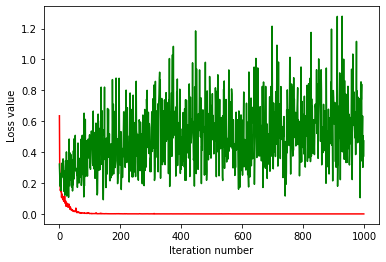

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_loss_history,color='r')
plt.plot(test_loss_history,color='g')
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [59]:

model = model.to("cpu")
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        acc = binary_acc(outputs,labels.unsqueeze(1))
        #acc = multi_class_acc(outputs,labels.unsqueeze(1))

print("Test accuracy = {}".format(acc))

Test accuracy = 84.0
